# Tarea 1

## Integrantes:
- Fernando Contreras
- Ignacio Morande
- Alberto Bella


El archivo AirPassengers.csv tiene los datos de una serie de tiempo correspondiente alnúmero de pasajeros de una línea aérea durante 12 años. 

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('AirPassengers.csv', delimiter = ',')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Ejercicio 1 (punto de regalo):
#Agregue una nueva columna llamada "ejeX" comenzando desde 0 hasta 143 para mostrar el eje X. (1 punto de regalo)

In [ ]:
data['ejeX'] = [i for i in range(0, 144)]
data['ejeX']
data.head()

,Month,#Passengers,ejeX
0,1949-01,112,0
1,1949-02,118,1
2,1949-03,132,2
3,1949-04,129,3
4,1949-05,121,4


In [ ]:
# Creamos nuevas variables que representaran diferentes inputs para el modelo 'perceptron'
# Cada variable representa las variables utilizadas en el modelo ARIMA
# Donde 'Pt-1' es la cantidad de pasajeros en t-1, 'Pt-2' es la cantidad de pasajeros en t-2 y 'Pt-12' es la cantidad de pasajeros en t-12

data['Pt-1'] = data['#Passengers']
data['Pt-2'] = data['#Passengers']
data['Pt-12'] = data['#Passengers']

for i in range(12, len(data)):
  data['Pt-1'][i] = data['#Passengers'][i-1]
  data['Pt-2'][i] = data['#Passengers'][i-2]
  data['Pt-12'][i] = data['#Passengers'][i-12]


In [ ]:
data.head()

,Month,#Passengers,ejeX,Pt-1,Pt-2,Pt-12
0,1949-01,112,0,112,112,112
1,1949-02,118,1,118,118,118
2,1949-03,132,2,132,132,132
3,1949-04,129,3,129,129,129
4,1949-05,121,4,121,121,121


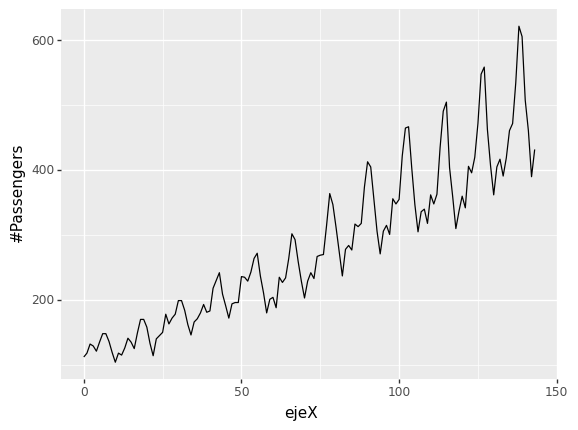

<ggplot: (8750817541801)>

In [ ]:
ggplot(data)+aes(x="ejeX",y="#Passengers")+geom_line()

Si ejecutó en forma correcta el código anterior, podrá observar una serie de tiempo con una clara tendencia anual que va aumentando en forma mensual. Especificamente, esta serie de tiempo se puede modelar con un modelo ARIMA(2,1,0)con periodo 12. 

El modelo arima corresponde a un modelo autoregresivo (AR) con tendencia periodica (I) y medias móviles (MA). Al ser un modelo ARIMA(2,1,0) con periodo 12, significa que el valor $x_t=x_{t-1}+x_{t-2}+x_{t-12}$

# Ejercicio 2 (modelando la serie de tiempo, 2 puntos):
En este ejercicio tendrá que modificar los datos y aplicar un modelo perceptron que pueda replicar el comportamiento del modelo ARIMA(2,1,0) con periodo 12 ($x_t=x_{t-1}+x_{t-2}+x_{t-12}$). En resumen, deberá:
1. Modificar los datos y ajustarlos para que pueda replicar elmodelo (0.5 puntos).
2. Entrenar el modelo sobre los datos modificados (0.5 puntos).
3. Aplicar el modelo a los datos modificados (si, a los mismos datos) (0.5 puntos).
4. Graficar los datos originales versus los datos aprendidos (0.5 puntos punto, se adjunta la solución obtenida).
![Unknown.png](attachment:Unknown.png)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Pt-1', 'Pt-2', 'Pt-12']][12:], data['#Passengers'][12:], test_size=0.35, random_state=42) # Desde el 12 en adelante

In [ ]:
X_train

,Pt-1,Pt-2,Pt-12
21,158,170,119
45,209,242,162
79,364,315,293
37,171,166,150
112,348,362,355
...,...,...,...
83,237,274,229
118,359,404,305
26,150,145,141
104,467,465,355


In [ ]:
from tensorflow.keras import *

# 2 capas:
inputLayer = layers.Input(shape=(3,)) # Shape 3 por cada input que se agregue al modelo (Pt-1, Pt-2 y Pt-3)
outputLayer = layers.Dense(1, activation='linear', use_bias=False)(inputLayer) 
# La función de activación es la función identidad (lineal), ya que buscamos hacer una regresion, sin sesgo

# Modelo
perceptron = models.Model(inputLayer, outputLayer)

In [ ]:
resultados = []
# epochs de 100 a 600 de 50 a 50; batch de 4 a 16 de 2 en 2

for i in range(100, 650, 50):
  for j in range(4, 18, 2):
    
    # Entrenamiento
    perceptron.compile(optimizer='adam', loss='MeanSquaredError', metrics=['RootMeanSquaredError', 'MeanAbsolutePercentageError'])
    # El optimizador utilizado es 'Adam' ya que entrega mejores resultados
    # La función de error es el Error Quadratico Medio, ya que se busca hacer una regresion
    # Y las metricas utilizadas son de acorde al problema

    perceptron.fit(X_train, y_train, epochs=i, batch_size=j, shuffle=True, verbose=0)
    resultado = perceptron.evaluate(X_test, y_test, return_dict=True)
    resultado['epoch'] = i
    resultado['batch_size'] = j
    resultados.append(resultado)

In [ ]:
resultados = pd.DataFrame(resultados)
resultados

,loss,root_mean_squared_error,mean_absolute_percentage_error,epoch,batch_size
0,4683.894043,68.438980,17.051741,100,4
1,3487.605957,59.055958,14.711095,100,6
2,2617.680908,51.163277,12.666677,100,8
3,1979.974121,44.496899,10.922545,100,10
4,1530.440796,39.120850,9.641041,100,12
...,...,...,...,...,...
72,187.760895,13.702587,4.300177,600,8
73,187.313950,13.686269,4.308879,600,10
74,187.600601,13.696737,4.300882,600,12
75,194.902969,13.960765,4.261510,600,14


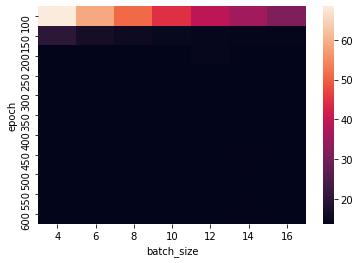

In [ ]:
sns.heatmap(resultados[['epoch', 'batch_size', 'root_mean_squared_error']].pivot(index='epoch', columns='batch_size', values='root_mean_squared_error'))

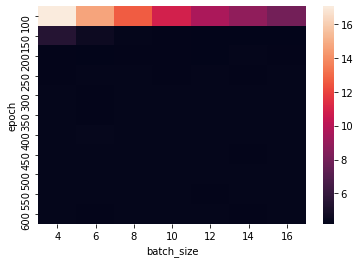

In [ ]:
sns.heatmap(resultados[['epoch', 'batch_size', 'mean_absolute_percentage_error']].pivot(index='epoch', columns='batch_size', values='mean_absolute_percentage_error'))

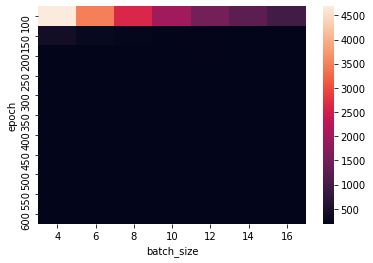

In [ ]:
sns.heatmap(resultados[['epoch', 'batch_size', 'loss']].pivot(index='epoch', columns='batch_size', values='loss'))

In [ ]:
# Dado a que no habia mayor variación al variar el numero de epocas y tamaño de los paquetes, se decidio por un tamaño medio para evitar Overfitting
perceptron.fit(X_train, y_train, epochs=450, batch_size=12, shuffle=True, verbose=0)
# Evaluar
resultados = perceptron.evaluate(X_test, y_test, return_dict=True)
resultados

2/2 [==============================] - 0s 4ms/step - loss: 190.5450 - root_mean_squared_error: 13.8038 - mean_absolute_percentage_error: 4.2767


{'loss': 190.54502868652344,
 'mean_absolute_percentage_error': 4.276708126068115,
 'root_mean_squared_error': 13.803804397583008}

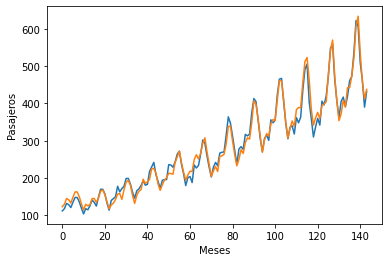

In [ ]:
# Vizualisacion de resultados preliminares
test = perceptron.predict(data[['Pt-1', 'Pt-2', 'Pt-12']])

plt.plot(data['ejeX'], data['#Passengers'])
plt.plot(data['ejeX'], test)
plt.xlabel('Meses')
plt.ylabel('Pasajeros')
plt.show()

# Teoría (3 puntos)
1. Desarrolle $\nabla L(w_i)$ en forma general para cualquier función de activación $\phi(\cdot)$. Considere el error cuadrático como la función de error. (2 puntos)
2. Corrobore su solución con lo visto en clases, es decir, cuando se usa la función de identidad (0.5 puntos).
3. Escriba la solución cuando se usa la función de activación sigmoide (0.5 puntos).

1.
$\nabla{L(w_i)} \text{:}$

$L(y, \phi(\cdot)) = (y - \phi(w_0 + \overline{WX}))^{2}$

$\nabla{L(y, \phi(\cdot))} = \nabla{(y - \phi(w_0 + \overline{WX}))^{2}} = \frac{\partial}{\partial w_i}(y - \phi(w_0 + \overline{WX}))^{2}$

$\frac{\partial}{\partial w_0}L(y, \phi(\cdot)) = 2 \cdot (y - \phi(w_0 + \overline{WX})) \cdot (-\frac{\partial}{\partial w_0}\phi(w_0 + \overline{WX}))$

$\frac{\partial}{\partial w_1}L(y, \phi(\cdot)) = 2 \cdot (y - \phi(w_0 + \overline{WX})) \cdot (-\frac{\partial}{\partial w_1}\phi(w_0 + \overline{WX}))$

$...$

$\frac{\partial}{\partial w_i}L(y, \phi(\cdot)) = 2 \cdot (y - \phi(w_0 + \overline{WX})) \cdot (-\frac{\partial}{\partial w_i}\phi(w_0 + \overline{WX}))$

2.
$\phi(w_0 + \overline{WX}) = w_0 + \overline{WX}$

$\frac{\partial}{\partial w_0}L(y, \phi(\cdot)) = 2 \cdot (y - (w_0 + \overline{WX})) \cdot (-1))$

$\frac{\partial}{\partial w_1}L(y, \phi(\cdot)) = 2 \cdot (y - (w_0 + \overline{WX})) \cdot (-x_1))$

$...$

$\frac{\partial}{\partial w_1}L(y, \phi(\cdot)) = 2 \cdot (y - (w_0 + \sum_{i=1}^{d}{w_ix_i}) \cdot (-x_1))$

$...$

$\frac{\partial}{\partial w_i}L(y, \phi(\cdot)) = 2 \cdot (y - (w_0 + \sum_{i=1}^{d}{w_ix_i}) \cdot (-x_i)), \forall i > 0 \text{ & } i \leq d$

$...$

$\nabla{L(y, \phi(\cdot))} = -2 \cdot x_i \cdot (y - \phi(\cdot)), \text{suponiendo que la funcion de activacion es la funcion identidad } (\phi(v) = v)$

3.
$\phi(w_0 + \overline{WX}) = \frac{1}{1 + e^{-(w_0 + \overline{WX})}}$

$\frac{\partial}{\partial w_i}L(y, \phi(w_0 + \overline{WX})) = 2 \cdot (y - \frac{1}{1 + e^{-(w_0 + \overline{WX})}}) \cdot (-\frac{\partial}{\partial w_i}(\frac{1}{1 + e^{-(w_0 + \overline{WX})}}))$

$\frac{\partial}{\partial w_i}L(y, \phi(w_0 + \overline{WX})) = 2 \cdot (y - \frac{1}{1 + e^{-(w_0 + \overline{WX})}}) \cdot (-(\frac{1}{1 + e^{-(w_0 + \overline{WX})}}) \cdot (1 - \frac{1}{1 + e^{-(w_0 + \overline{WX})}}))$

$...$

$\nabla{L(y, \phi(\cdot))} = -2 \cdot (y - \phi(\cdot)) \cdot \phi(\cdot) \cdot (1 - \phi(\cdot)), \text{suponiendo que la funcion de activacion es la funcion sigmoide } (\phi(v) = \frac{1}{1 + e^{-v}})$